# Passo 1: Importar as Bibliotecas necessárias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os as os
from google.colab import files
from sklearn.ensemble import IsolationForest

# Passo 2: Carregar o Dataset Titanic

In [3]:
# Carregar o dataset Titanic
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [4]:
# Visualizar os nomes das colunas
print("Nomes das colunas:")
print(df.columns)

Nomes das colunas:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
# Resumo das colunas
print("\nResumo das colunas:")
print(df.info())


Resumo das colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
# Descrição das colunas
coluna_descricao = {
    "PassengerId": "ID único do passageiro.",
    "Survived": "Indica se o passageiro sobreviveu (1) ou não (0).",
    "Pclass": "Classe do bilhete do passageiro (1 = 1ª classe, 2 = 2ª classe, 3 = 3ª classe).",
    "Name": "Nome do passageiro.",
    "Sex": "Gênero do passageiro (male = masculino, female = feminino).",
    "Age": "Idade do passageiro em anos.",
    "SibSp": "Número de irmãos/irmãs ou cônjuges a bordo do Titanic.",
    "Parch": "Número de pais/filhos a bordo do Titanic.",
    "Ticket": "Número do bilhete.",
    "Fare": "Tarifa paga pelo bilhete.",
    "Cabin": "Número da cabine do passageiro.",
    "Embarked": "Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)."
}

# Imprimir a descrição das colunas
print("\nDescrição das colunas:")
for coluna, descricao in coluna_descricao.items():
    print(f"{coluna}: {descricao}")


Descrição das colunas:
PassengerId: ID único do passageiro.
Survived: Indica se o passageiro sobreviveu (1) ou não (0).
Pclass: Classe do bilhete do passageiro (1 = 1ª classe, 2 = 2ª classe, 3 = 3ª classe).
Name: Nome do passageiro.
Sex: Gênero do passageiro (male = masculino, female = feminino).
Age: Idade do passageiro em anos.
SibSp: Número de irmãos/irmãs ou cônjuges a bordo do Titanic.
Parch: Número de pais/filhos a bordo do Titanic.
Ticket: Número do bilhete.
Fare: Tarifa paga pelo bilhete.
Cabin: Número da cabine do passageiro.
Embarked: Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).


In [7]:
# Exibir as primeiras linhas do dataset
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# Passo 3: Exportar o arquivo imputado para uma pasta local

In [8]:
# Salvar o DataFrame como um arquivo CSV
df.to_csv('titanic.csv', index=False)

In [9]:
# Baixar o arquivo CSV
files.download('titanic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Passo 4: Pre-processamento dos dados
É importante tratar os dados antes de aplicar o Isolation Forest. Vamos preencher valores ausentes e selecionar algumas colunas numéricas.

In [10]:
# Verificar valores ausentes
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
# Selecionar colunas numéricas para detectar outliers
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
df_numerical = df[numerical_features]

In [12]:
# Inicializar o modelo Isolation Forest
model = IsolationForest(contamination=0.05, random_state=42)

In [13]:
# Import SimpleImputer to handle missing values
from sklearn.impute import SimpleImputer

In [14]:
# Create an imputer to fill missing values with the median
imputer = SimpleImputer(strategy='median')

# Passo 5: Processamento do modelo

In [15]:
# Fit the imputer to your numerical data and transform it
df_numerical_imputed = imputer.fit_transform(df_numerical)

In [16]:
# Ajustar o modelo aos dados numéricos (após preenchimento de valores ausentes)
model.fit(df_numerical_imputed)

IsolationForest(contamination=0.05, random_state=42)

In [17]:
# Predict outliers
outlier_predictions = model.predict(df_numerical_imputed)

In [18]:
# Add the predictions as a new column to your original DataFrame
df['Outlier'] = outlier_predictions

In [19]:
# Display the rows where outliers were detected (outlier_predictions == -1)
print(df[df['Outlier'] == -1])

     PassengerId  Survived  Pclass  \
13            14         0       3   
16            17         0       3   
25            26         1       3   
27            28         0       1   
50            51         0       3   
59            60         0       3   
71            72         0       3   
88            89         1       1   
118          119         0       1   
159          160         0       3   
164          165         0       3   
167          168         0       3   
180          181         0       3   
201          202         0       3   
258          259         1       1   
268          269         1       1   
297          298         0       1   
299          300         1       1   
305          306         1       1   
311          312         1       1   
324          325         0       3   
341          342         1       1   
377          378         0       1   
380          381         1       1   
386          387         0       3   
438         

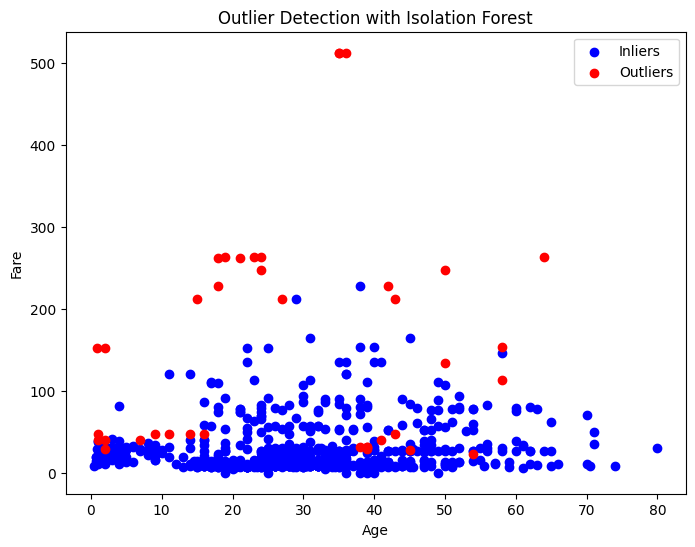

In [20]:
# Choose two numerical features to plot (adjust as needed)
feature1 = 'Age'
feature2 = 'Fare'

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[feature1][df['Outlier'] == 1],
            df[feature2][df['Outlier'] == 1],
            c='blue', label='Inliers')
plt.scatter(df[feature1][df['Outlier'] == -1],
            df[feature2][df['Outlier'] == -1],
            c='red', label='Outliers')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Outlier Detection with Isolation Forest')
plt.legend()
plt.show()

In [21]:
# Create a new DataFrame without outliers
df_no_outliers = df[df['Outlier'] == 1]

# Optionally, reset the index of the new DataFrame
df_no_outliers = df_no_outliers.reset_index(drop=True)

print(df_no_outliers.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Outlier  
0      0         A/5 21171   7.2500   NaN        S        1  
1      0          PC 17599  71.2833   C85        C        1  
2      0  STON/O2. 3101282   7.9250   NaN        S        1  
3      0            113803  53.1000  C123        S        1  
4      0  

# Passo 6: Exportar o arquivo sem os outliers para uma pasta local

In [22]:
# Salvar o DataFrame como um arquivo CSV
df_no_outliers.to_csv('titanic_no_outliers.csv', index=False)

In [23]:
# Baixar o arquivo CSV
files.download('titanic_no_outliers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>